In [53]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import seaborn as sns

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "../Pymaceuticals-/mouse_drug_data.csv"
clinical_trial_data_to_load = "../Pymaceuticals-/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = "../Pymaceuticals-/mouse_drug_data.csv"
mouse_data = pd.read_csv(mouse_drug_data)


clinicaltrial_data = "../Pymaceuticals-/clinicaltrial_data.csv"
clinical_data = pd.read_csv(clinicaltrial_data)


# Combine the data into a single dataset
mouse_clinical = clinical_data.merge(mouse_data, on="Mouse ID")
# Display the data table for preview
mouse_clinical

#merged table with only drugs of interest

#keep only the drugs we want to examine
mouse_clinical_abreviated = mouse_clinical[(mouse_clinical["Drug"] == 'Capomulin') |
                      (mouse_clinical["Drug"] == 'Infubinol') |
                      (mouse_clinical["Drug"] == 'Ketapril') |
                      (mouse_clinical["Drug"] == 'Placebo')
                     ]

mouse_clinical_abreviated.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [64]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
merged_mouse_clinical_group = mouse_clinical_abreviated.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
mean_tumor = pd.DataFrame(merged_mouse_clinical_group.mean()["Tumor Volume (mm3)"])
# Preview DataFrame
mean_tumor.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [65]:
mean_tumor = mean_tumor.unstack(level = 0)
mean_tumor.columns = mean_tumor.columns.get_level_values(1)
mean_tumor

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [66]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
merged_mouse_clinical_group = mouse_clinical_abreviated.groupby(["Drug", "Timepoint"])
# Convert to DataFrame
standard_err = pd.DataFrame(merged_mouse_clinical_group.sem()["Tumor Volume (mm3)"])
# Preview DataFrame
standard_err.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [67]:
# Minor Data Munging to Re-Format the Data Frames
standard_err = standard_err.unstack(level = 0)
standard_err.columns = standard_err.columns.get_level_values(1)

# Preview that Reformatting worked
standard_err

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


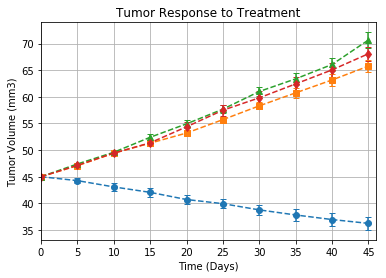

In [51]:
# Generate the Plot (with Error Bars)
plt.xticks(np.arange(0, mean_tumor.index.max()+3 , 5)) 
plt.xlim(0, mean_tumor.index.max() + 1) 

markers = ['o', 's', '^', 'd']

x_values = mean_tumor.index 

#Capomulin, = plt.plot(xvals,mean_tumor, marker="o",color="red", linewidth=1, label="Capomulin")
#Infubinol, = plt.plot(xvals, mean_tumor, marker="s", color="blue", linewidth=1, label="Infubinol")
#Ketapril, = plt.plot(xvals, mean_tumor, marker="^", color="green", linewidth=1, label="Ketapril")
#Placebo, = plt.plot(xvals, mean_tumor, marker="d", color="black", linewidth=1, label="Placebo")


count = 0

for c in mean_tumor.columns:
    plt.errorbar(x_values, 
                 mean_tumor[c], 
                 standard_err[c], 
                 linestyle = '--', 
                 marker =  markers[count], 
                 capthick = 1,
                 capsize = 3) 
    count += 1

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.grid()

plt.show()


# Save the Figure



In [52]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [68]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
merged_mouse_clinical_group = mouse_clinical_abreviated.groupby(["Drug", "Timepoint"])
# Convert to DataFrame
mean_metastatic = pd.DataFrame(merged_mouse_clinical_group.mean()["Metastatic Sites"])
# Preview DataFrame
mean_metastatic.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [69]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
merged_mouse_clinical_group = mouse_clinical_abreviated.groupby(["Drug", "Timepoint"])
# Convert to DataFrame
standard_err_metastatic = pd.DataFrame(merged_mouse_clinical_group.sem()["Metastatic Sites"])
# Preview DataFrame
standard_err_metastatic.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [28]:
# Minor Data Munging to Re-Format the Data Frames
mean_metastatic = mean_metastatic.unstack(level = 0)
mean_metastatic.columns = mean_metastatic.columns.get_level_values(1)

# Preview that Reformatting worked
mean_metastatic

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [29]:
# Minor Data Munging to Re-Format the Data Frames
standard_err_metastatic = standard_err_metastatic.unstack(level = 0)
standard_err_metastatic.columns = standard_err_metastatic.columns.get_level_values(1)

# Preview that Reformatting worked
standard_err_metastatic

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


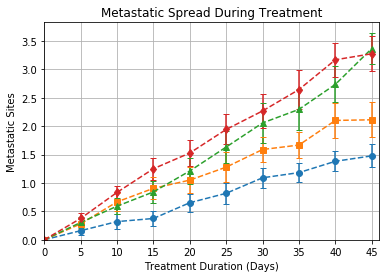

In [32]:
# Generate the Plot (with Error Bars)
plt.xticks(np.arange(0,mean_metastatic.index.max() + 3 ,5))
plt.xlim(0, mean_metastatic.index.max()+1)
plt.ylim(0, mean_metastatic.max().max() + standard_err_metastatic.max().max() + .1)


markers = ['o', 's', '^', 'd']

x_values = mean_metastatic.index 

#Capomulin, = plt.plot(xvals,mean_tumor, marker="o",color="red", linewidth=1, label="Capomulin")
#Infubinol, = plt.plot(xvals, mean_tumor, marker="s", color="blue", linewidth=1, label="Infubinol")
#Ketapril, = plt.plot(xvals, mean_tumor, marker="^", color="green", linewidth=1, label="Ketapril")
#Placebo, = plt.plot(xvals, mean_tumor, marker="d", color="black", linewidth=1, label="Placebo")


count = 0

for c in mean_tumor.columns:
    plt.errorbar(x_values, 
                 mean_metastatic[c], 
                 standard_err_metastatic[c], 
                 linestyle = '--', 
                 marker =  markers[count], 
                 capthick = 1,
                 capsize = 3) 
    count += 1

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")

plt.grid()

# Save the Figure

# Show the Figure
plt.show()

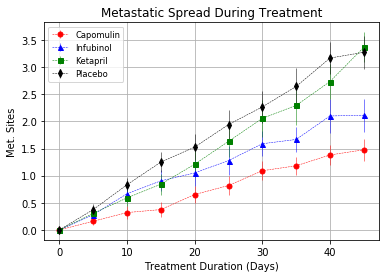

## Survival Rates

In [34]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
merged_mouse_clinical_group = mouse_clinical_abreviated.groupby(["Drug", "Timepoint"])
# Convert to DataFrame
mice_count = pd.DataFrame(mouse_clinical_abreviated.groupby(["Drug", "Timepoint"]).count()["Mouse ID"])
# Preview DataFrame
mice_count


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
          25               22
          30               22
          35               22
          40               21
          45               21
Infubinol 0                25
          5                25
          10               21
          15               21
          20               20
          25               18
          30               17
          35               12
          40               10
          45                9
Ketapril  0                25
          5                23
          10               22
          15               19
          20               19
          25               19
          30               18
          35               17
          40               15
          45               11
Placebo   0                25
          5                24
          10               24
          15               20
          20               19
          25               17
          30               15
          35               14
          40               12
          45               11

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [35]:
# Minor Data Munging to Re-Format the Data Frames
mice_count = mice_count.unstack(level = 0)
mice_count.columns = mice_count.columns.get_level_values(1)

# Preview the Data Frame
mice_count

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


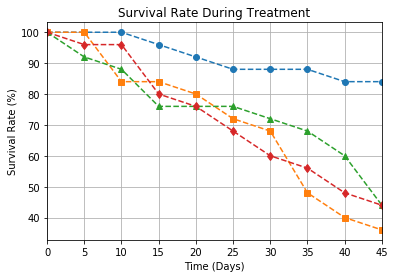

In [36]:
# Generate the Plot (Accounting for percentages)
plt.xlim(0, mice_count.index.max())


x_values = mice_count.index 

count = 0 

for c in mice_count:
    y_values = mice_count[c]/mice_count.loc[0,c] * 100 
    plt.plot(x_values, 
             y_values, 
             linestyle = '--', 
             marker =  markers[count], 
             )
    count += 1

plt.title("Survival Rate During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

plt.grid()

# Save the Figure

# Show the Figure
plt.show()

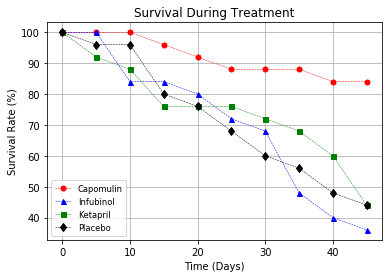

## Summary Bar Graph

In [37]:
# Calculate the percent changes for each drug
tumor_percent_change = (mean_tumor.loc[45, :] - mean_tumor.loc[0, :])/mean_tumor.loc[0, :] * 100

# Display the data to confirm
tumor_percent_change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple
plt.grid()
plt.bar(np.arange(4), 
        tumor_percent_change, 
        # colors each bar appropriately based on + or - values by using a conditional
        color = ['red' if tumor_percent_change[r] > 0 else 'green' for r in np.arange(len(x_labels))]
       )

# Splice the data between passing and failing drugs
count = 0

for r in tumor_percent_change:
    if r < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(round(r, 0)) + "%", ha = "center", color = "white")
    count += 1

# Orient widths. Add labels, tick marks, etc. 
plt.axhline(y=0, color = "black")
plt.xticks(np.arange(len(x_labels)), x_labels)
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

# Use functions to label the percentages of changes
x_labels = tumor_percent_change.index

# Call functions to implement the function calls


# Save the Figure


# Show the Figure
plt.show()

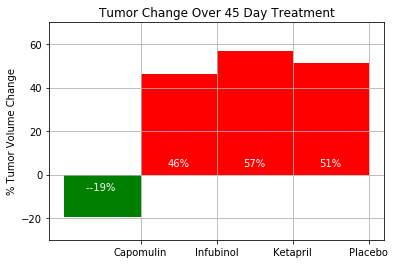

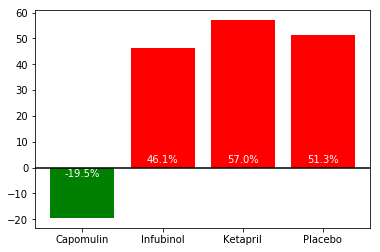

In [39]:
plt.axhline(y=0, color = 'black')
x_labels = tumor_percent_change.index
#puts drug names as labels
plt.xticks(np.arange(len(x_labels)), x_labels)

#graphs % change of tumor as bar graph
plt.bar(np.arange(4), 
        tumor_percent_change, 
        # colors each bar appropriately based on + or - values by using a conditional
        color = ['red' if tumor_percent_change[r] > 0 else 'green' for r in np.arange(len(x_labels))]
       )

#count for x coordinate location of value label
count = 0

#loops through tumor change data and places the value in the correct position based on + or - values
for r in tumor_percent_change:
    if r < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(round(r, 1)) + '%', ha = 'center', color = 'white')
    count += 1
    
plt.show()
